In [91]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler

In [193]:
train = pd.read_csv("trainKNN.txt", header=None)
train.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
test = pd.read_csv("testKNN.txt", header=None)
test.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
train.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [93]:
train = train.drop(['ID'], axis = 1)
train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [94]:
train.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [95]:
train = train.drop_duplicates()
train.shape

(195, 10)

In [96]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,195.0,1.518275,0.003051,1.51131,1.516455,1.51763,1.51895,1.53393
Na,195.0,13.370923,0.782858,10.73000,12.875000,13.27000,13.78500,15.79000
Mg,195.0,2.753538,1.394135,0.00000,2.335000,3.48000,3.60500,4.49000
Al,195.0,1.459385,0.487835,0.29000,1.190000,1.36000,1.62500,3.50000
Si,195.0,72.639846,0.763005,69.81000,72.330000,72.81000,73.08000,75.18000
K,195.0,0.521487,0.673791,0.00000,0.145000,0.56000,0.61000,6.21000
Ca,195.0,8.907333,1.424359,5.43000,8.220000,8.57000,9.07500,16.19000
Ba,195.0,0.165077,0.486304,0.00000,0.000000,0.00000,0.00000,3.15000
Fe,195.0,0.050513,0.086506,0.00000,0.000000,0.00000,0.09000,0.34000
Type of glass,195.0,2.676923,2.064234,1.00000,1.000000,2.00000,3.00000,7.00000


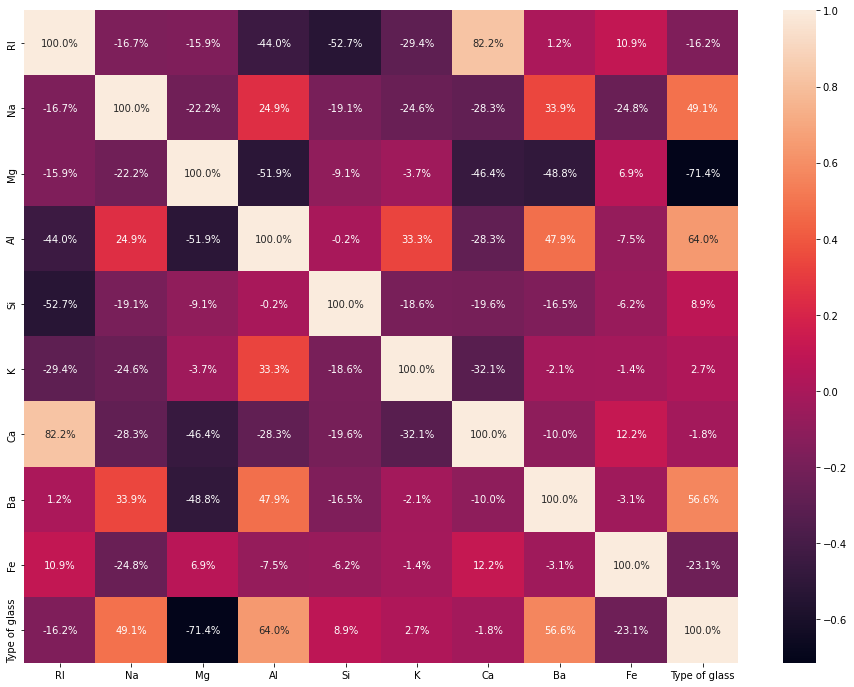

In [97]:
plt.figure(figsize = (16, 12))
sns.heatmap(train.corr(), annot = True, fmt = '.1%')

In [98]:
keys = []
for i in train.keys():
  keys.append(i)
keys.remove('Type of glass')
print(keys)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']


In [99]:
X = train[keys].values
y = train['Type of glass'].values

In [100]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [101]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

KNN model by splitting the train data

**Euclidean metric**

In [106]:
for i in [1,2,3,4,5,6,7,8,9,10,20,25,30,35,40,45,50]:
  knn = KNeighborsClassifier(i,metric=distance.sqeuclidean)
  knn.fit(x_train,y_train)
  print("K value:", i, "score:", np.mean(cross_val_score(knn, x_train, y_train, cv=3)))

K value: 1 score: 0.7115384615384616
K value: 2 score: 0.6602564102564102
K value: 3 score: 0.6538461538461539
K value: 4 score: 0.6666666666666666
K value: 5 score: 0.6282051282051282
K value: 6 score: 0.6474358974358975
K value: 7 score: 0.6282051282051283
K value: 8 score: 0.6474358974358974
K value: 9 score: 0.6410256410256411
K value: 10 score: 0.6282051282051282
K value: 20 score: 0.5705128205128206
K value: 25 score: 0.5064102564102565
K value: 30 score: 0.48717948717948717
K value: 35 score: 0.4551282051282051
K value: 40 score: 0.4615384615384615
K value: 45 score: 0.42948717948717946
K value: 50 score: 0.39102564102564097


In [107]:
knn = KNeighborsClassifier(n_neighbors=5,metric=distance.sqeuclidean) 
knn.fit(x_train, y_train)
print("Train Accuracy : ", knn.score(x_train,y_train))
print("Val Accuracy : ", np.mean(cross_val_score(knn, x_train, y_train, cv=3)))

Train Accuracy :  0.7564102564102564
Val Accuracy :  0.6282051282051282


Using the test data

In [122]:
test.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [123]:
test2 = test.drop(['Type of glass'], axis = 1)
test2 = test2.drop(['ID'], axis = 1)
test2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17
1,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03
3,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00
4,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24


In [125]:
test2 = test2.values
test2

array([[1.52152e+00, 1.30500e+01, 3.65000e+00, 8.70000e-01, 7.23200e+01,
        1.90000e-01, 9.85000e+00, 0.00000e+00, 1.70000e-01],
       [1.52152e+00, 1.31200e+01, 3.58000e+00, 9.00000e-01, 7.22000e+01,
        2.30000e-01, 9.82000e+00, 0.00000e+00, 1.60000e-01],
       [1.52300e+00, 1.33100e+01, 3.58000e+00, 8.20000e-01, 7.19900e+01,
        1.20000e-01, 1.01700e+01, 0.00000e+00, 3.00000e-02],
       [1.51709e+00, 1.30000e+01, 3.47000e+00, 1.79000e+00, 7.27200e+01,
        6.60000e-01, 8.18000e+00, 0.00000e+00, 0.00000e+00],
       [1.51660e+00, 1.29900e+01, 3.18000e+00, 1.23000e+00, 7.29700e+01,
        5.80000e-01, 8.81000e+00, 0.00000e+00, 2.40000e-01],
       [1.51839e+00, 1.28500e+01, 3.67000e+00, 1.24000e+00, 7.25700e+01,
        6.20000e-01, 8.68000e+00, 0.00000e+00, 3.50000e-01],
       [1.51832e+00, 1.33300e+01, 3.34000e+00, 1.54000e+00, 7.21400e+01,
        5.60000e-01, 8.99000e+00, 0.00000e+00, 0.00000e+00],
       [1.51934e+00, 1.36400e+01, 3.54000e+00, 7.50000e-01, 7.

In [126]:
test2_t =scaler.transform(test2)
ans = knn.predict(test2_t)
print(ans)

[1 1 1 2 1 2 1 2 2 5 2 2 6 2 7 7 7 7]


In [127]:
test['Type_of_glass_pred']  = ans

In [128]:
test

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type_of_glass_pred
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2,1
5,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2,2
6,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3,1
7,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3,2
8,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3,2
9,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5,5


**Manhattan metric**

In [131]:
for i in [1,2,3,4,5,6,7,8,9,10,20,25,30,35,40,45,50]:
  knn = KNeighborsClassifier(i,metric=distance.cityblock)
  knn.fit(x_train,y_train) 
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=3))) 

K value  :  1  score :  0.7051282051282052
K value  :  2  score :  0.6666666666666666
K value  :  3  score :  0.6794871794871794
K value  :  4  score :  0.717948717948718
K value  :  5  score :  0.6794871794871794
K value  :  6  score :  0.6923076923076922
K value  :  7  score :  0.6602564102564102
K value  :  8  score :  0.6602564102564102
K value  :  9  score :  0.673076923076923
K value  :  10  score :  0.6794871794871794
K value  :  20  score :  0.5897435897435898
K value  :  25  score :  0.5384615384615384
K value  :  30  score :  0.5448717948717948
K value  :  35  score :  0.5064102564102564
K value  :  40  score :  0.5256410256410257
K value  :  45  score :  0.4679487179487179
K value  :  50  score :  0.4615384615384615


In [135]:
knn = KNeighborsClassifier(n_neighbors=10,metric=distance.cityblock)
knn.fit(x_train, y_train)
print("Train Accuracy : ", knn.score(x_train,y_train)) 
print("Val Accuracy : ", np.mean(cross_val_score(knn, x_train, y_train, cv=3)))

Train Accuracy :  0.75
Val Accuracy :  0.6794871794871794


Using the test data

In [137]:
test2

array([[1.52152e+00, 1.30500e+01, 3.65000e+00, 8.70000e-01, 7.23200e+01,
        1.90000e-01, 9.85000e+00, 0.00000e+00, 1.70000e-01],
       [1.52152e+00, 1.31200e+01, 3.58000e+00, 9.00000e-01, 7.22000e+01,
        2.30000e-01, 9.82000e+00, 0.00000e+00, 1.60000e-01],
       [1.52300e+00, 1.33100e+01, 3.58000e+00, 8.20000e-01, 7.19900e+01,
        1.20000e-01, 1.01700e+01, 0.00000e+00, 3.00000e-02],
       [1.51709e+00, 1.30000e+01, 3.47000e+00, 1.79000e+00, 7.27200e+01,
        6.60000e-01, 8.18000e+00, 0.00000e+00, 0.00000e+00],
       [1.51660e+00, 1.29900e+01, 3.18000e+00, 1.23000e+00, 7.29700e+01,
        5.80000e-01, 8.81000e+00, 0.00000e+00, 2.40000e-01],
       [1.51839e+00, 1.28500e+01, 3.67000e+00, 1.24000e+00, 7.25700e+01,
        6.20000e-01, 8.68000e+00, 0.00000e+00, 3.50000e-01],
       [1.51832e+00, 1.33300e+01, 3.34000e+00, 1.54000e+00, 7.21400e+01,
        5.60000e-01, 8.99000e+00, 0.00000e+00, 0.00000e+00],
       [1.51934e+00, 1.36400e+01, 3.54000e+00, 7.50000e-01, 7.

In [138]:
test2_t = scaler.transform(test2)
ans = knn.predict(test2_t)
print(ans)

[1 1 1 2 1 1 2 1 1 2 2 2 5 2 7 7 7 7]


In [139]:
test['Type of glass pred'] = ans
test

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type_of_glass_pred,Type of glass pred
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1,1,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1,1,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,1,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2,2,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2,1,1
5,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2,2,1
6,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3,1,2
7,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3,2,1
8,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3,2,1
9,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5,5,2


knn model without splitting data

In [144]:
X = train.drop(['Type of glass'], axis = 1)
Y = train["Type of glass"]

In [149]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [150]:
scaler = StandardScaler()
scaler.fit(x_train)
tr_x_train = scaler.transform(x_train)
tr_x_test = scaler.transform(x_test)

**Euclidean metric**

In [158]:
for i in [2,3,4,5,6,7,8,9,10,20,25,30,35,40,45,50]:
  knn = KNeighborsClassifier(i,metric=distance.sqeuclidean)
  knn.fit(x_train,y_train)
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=5))) 


K value  :  2  score :  0.9935483870967742
K value  :  3  score :  0.9935483870967742
K value  :  4  score :  0.9870967741935484
K value  :  5  score :  0.9935483870967742
K value  :  6  score :  0.9743951612903226
K value  :  7  score :  0.9870967741935484
K value  :  8  score :  0.9743951612903226
K value  :  9  score :  0.9808467741935484
K value  :  10  score :  0.9681451612903226
K value  :  20  score :  0.9233870967741936
K value  :  25  score :  0.878024193548387
K value  :  30  score :  0.8459677419354839
K value  :  35  score :  0.8268145161290322
K value  :  40  score :  0.833266129032258
K value  :  45  score :  0.794758064516129
K value  :  50  score :  0.8076612903225808


In [157]:
knn = KNeighborsClassifier(n_neighbors=3,metric=distance.sqeuclidean) 
knn.fit(x_train, y_train)
print("Train Accuracy : ", knn.score(x_train,y_train)) 
print("Val Accuracy : ", np.mean(cross_val_score(knn, x_train, y_train, cv=5)))

Train Accuracy :  0.9935897435897436
Val Accuracy :  0.9935483870967742


using the test data

In [181]:
test2=test.drop(['ID'], axis=1)
#test2=test2.drop(['Type of glass'], axis=1)
test2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [182]:
type(test2)

pandas.core.frame.DataFrame

In [183]:
test2 = test2.values

In [184]:
test2

array([[1.52152e+00, 1.30500e+01, 3.65000e+00, 8.70000e-01, 7.23200e+01,
        1.90000e-01, 9.85000e+00, 0.00000e+00, 1.70000e-01, 1.00000e+00],
       [1.52152e+00, 1.31200e+01, 3.58000e+00, 9.00000e-01, 7.22000e+01,
        2.30000e-01, 9.82000e+00, 0.00000e+00, 1.60000e-01, 1.00000e+00],
       [1.52300e+00, 1.33100e+01, 3.58000e+00, 8.20000e-01, 7.19900e+01,
        1.20000e-01, 1.01700e+01, 0.00000e+00, 3.00000e-02, 1.00000e+00],
       [1.51709e+00, 1.30000e+01, 3.47000e+00, 1.79000e+00, 7.27200e+01,
        6.60000e-01, 8.18000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00],
       [1.51660e+00, 1.29900e+01, 3.18000e+00, 1.23000e+00, 7.29700e+01,
        5.80000e-01, 8.81000e+00, 0.00000e+00, 2.40000e-01, 2.00000e+00],
       [1.51839e+00, 1.28500e+01, 3.67000e+00, 1.24000e+00, 7.25700e+01,
        6.20000e-01, 8.68000e+00, 0.00000e+00, 3.50000e-01, 2.00000e+00],
       [1.51832e+00, 1.33300e+01, 3.34000e+00, 1.54000e+00, 7.21400e+01,
        5.60000e-01, 8.99000e+00, 0.00000e+00

In [185]:
test2_t = scaler.transform(test2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [186]:
ans2 = knn.predict(test2_t)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [187]:
print(ans2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [188]:
test['Type of glass pred'] = ans2
test

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type of glass pred
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2,1
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2,1
5,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2,1
6,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3,1
7,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3,1
8,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3,1
9,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5,1


**Manhattan metric**

In [190]:
for i in [1,2,3,4,5,6,7,8,9,10,20,25,30,35,40,45,50]:
  knn = KNeighborsClassifier(i,metric=distance.cityblock)
  knn.fit(x_train,y_train) 
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=5)))

K value  :  1  score :  0.9870967741935484
K value  :  2  score :  0.9870967741935484
K value  :  3  score :  0.9870967741935484
K value  :  4  score :  0.9808467741935484
K value  :  5  score :  0.9808467741935484
K value  :  6  score :  0.9808467741935484
K value  :  7  score :  0.9808467741935484
K value  :  8  score :  0.9679435483870968
K value  :  9  score :  0.9681451612903226
K value  :  10  score :  0.955241935483871
K value  :  20  score :  0.9169354838709678
K value  :  25  score :  0.8846774193548388
K value  :  30  score :  0.845967741935484
K value  :  35  score :  0.8268145161290322
K value  :  40  score :  0.8268145161290322
K value  :  45  score :  0.839717741935484
K value  :  50  score :  0.8268145161290323


In [191]:
knn = KNeighborsClassifier(n_neighbors=8,metric=distance.cityblock) 
knn.fit(x_train, y_train)
print("Train Accuracy : ", knn.score(x_train,y_train)) 
print("Val Accuracy : ", np.mean(cross_val_score(knn, x_train, y_train, cv=5)))

Train Accuracy :  0.9807692307692307
Val Accuracy :  0.9679435483870968


Using the test data

In [194]:
test

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
5,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
6,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
7,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
8,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
9,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5


In [205]:
test2=test.drop(['ID'], axis=1)
test2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [206]:
test2 = test2.values

In [208]:
test2_t = scaler.transform(test2)
ans = knn.predict(test2_t)
print(ans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
